In [1377]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from timeit import default_timer as timer
import matplotlib.pyplot as plt

df = pd.read_csv('blobs.csv')
data = np.array(df.values)

In [1378]:
###color_generator###
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

In [1379]:
###1###
def k_Means(k):
    centres = np.random.randn(k,2)
    for i in range(1000):
        dist = distance.cdist(centres, data, 'euclidean')
        d_arg = np.argmin(dist, axis=0)
        for i in range(len(centres)):
            ar = np.where(d_arg==i, True, False)
            centres[i] = np.sum(data[ar], axis=0)/np.sum(ar)
    return centres  
col = "bgmcybgmcybgmcy"
def draw1():
    dist = distance.cdist(centr, data, 'euclidean')
    d_arg = np.argmin(dist, axis=0)
    for i in range(len(centr)):
        ar = np.where(d_arg==i, True, False)
        plt.scatter(data[ar][:,0], data[ar][:,1], c=col[i])
    plt.scatter(centr[:,0], centr[:,1], c='r')
    plt.show()


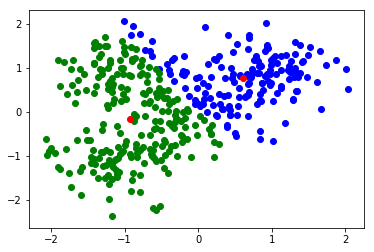

In [1380]:
centr = k_Means(2)
draw1()

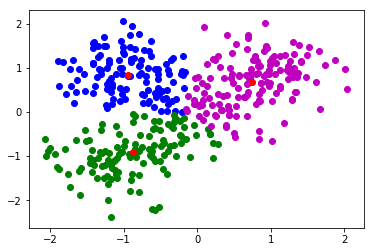

In [1381]:
centr = k_Means(3)
draw1()

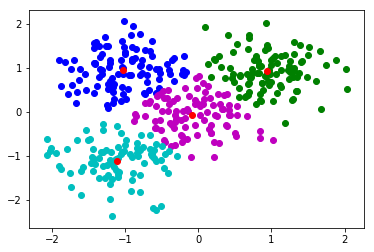

In [1393]:
centr = k_Means(4)
draw1()

In [1383]:
###2###
def DBSCAN(epsilon, m):
    dist = distance.cdist(data, data, 'euclidean')
    res_arg = np.sum(np.where(dist < epsilon, True, False), axis=1) >= m
    res_centres = data[res_arg]
    dist_to_centres = distance.cdist(data, res_centres, 'euclidean')
    max_val = np.max(np.where(dist_to_centres==0, 1, dist_to_centres))
    dist_ma = np.where(dist_to_centres < epsilon, dist_to_centres, max_val)
    alone_mask = np.where(dist_ma >= epsilon, True, False).all(axis=1)
    min_dist = np.argmin(dist_ma, axis=1)
    dist_mid = distance.cdist(res_centres, res_centres, 'euclidean')
    dist_mid = np.where(dist_mid < epsilon, 1, 0)
    mark = np.zeros(len(dist_mid), dtype=int)
    mark[0] = 1
    global mk
    mk = 1
    def df(ind):
        neib = np.argwhere(dist_mid[ind]>0)
        for nb in neib:
            if mark[nb[0]]==0:
                mark[nb[0]] = mk
                df(nb[0])
    def dfs():
        for i in range(len(dist_mid)):
            df(i)
            global mk
            mk+=1
    dfs()
    map_centres = {}
    centres_arg = np.arange(len(data))[res_arg]
    for i in range(len(mark)):
        map_centres[centres_arg[i]] = mark[i]
    
    res_marks = np.zeros(len(data), dtype=int)
    for i in range(len(data)):
        if not alone_mask[i]:
            res_marks[i] = map_centres[centres_arg[min_dist[i]]]
    return res_marks
    



In [1384]:
def draw2(col_gen=True):
    gra = list(set(res_mask))
    map_gra = {}
    cmap = get_cmap(len(gra))
    for i in range(len(gra)):
        map_gra[gra[i]] = i
    color = "kbgmcybgmcybgmcybgmcy"
    if not col_gen:
        cmap = lambda x: color[x]
    for i in range(len(data)):
        if map_gra[res_mask[i]] == 0:
            plt.scatter(data[i,0], data[i,1], c=k)
        else:
            plt.scatter(data[i,0], data[i,1], c=cmap(map_gra[res_mask[i]]))#c=color[map_gra[res[i]]])#
    plt.show()


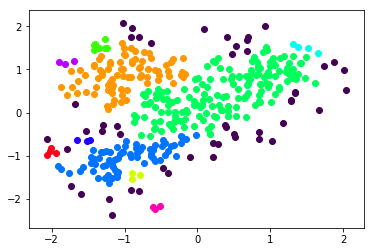

In [1385]:
res_mask = DBSCAN(0.175, 3)
draw2()

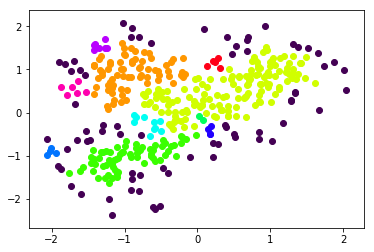

In [1386]:
res_mask = DBSCAN(0.175, 4)
draw2()

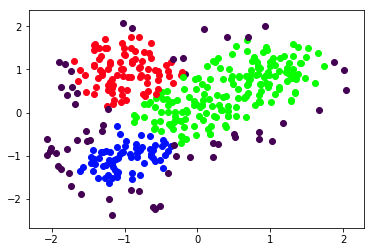

In [1387]:
res_mask = DBSCAN(0.5, 42)
draw2()

In [1388]:
###3###
ln = len(data)
s1 = distance.cdist(data, data, 'euclidean')
tru_eye = np.eye(ln, dtype=bool)
zero_eye = np.where(tru_eye, 0, 1)
one_eye = np.where(tru_eye, 1, 0)
def AffProp(it, alph):
    r = np.zeros((ln,ln),dtype=int)
    a = np.zeros((ln,ln),dtype=int)
    for i in range(it):
        summ = a + s
        max_arg = np.argpartition(summ, -2, axis=1)[:,-2:]
        row_cord = np.append(np.arange(400),np.arange(400)).reshape(2,ln).T
        mx = summ[row_cord, max_arg]
        r = alph*(s - mx[:,1].reshape(ln,1)) + (1-alph)*r
        r[row_cord[:,0], max_arg[:,1]] += alph*(mx[:,1] - mx[:,0])
        maxx = np.where(r > 0, r, 0)
        for_min = np.sum(maxx*zero_eye, axis=0) - maxx + r[tru_eye]
        a = alph*(np.where(for_min < 0, for_min, 0)*zero_eye + (np.sum(maxx*zero_eye, axis=0))*one_eye) + (1-alph)*a

    return np.argmax(a+r, axis=1)

In [1389]:
def draw3(col_gen=True):
    gra = list(set(res))
    map_gra = {}
    cmap = get_cmap(len(gra))
    for i in range(len(gra)):
        map_gra[gra[i]] = i
    color = "bgmcybgmcybgmcybgmcy"
    if not col_gen:
        cmap = lambda x: color[x]
    for i in range(len(data)):
        plt.scatter(data[i,0], data[i,1], c=cmap(map_gra[res[i]]))#c=color[map_gra[res[i]]])#
    plt.show()

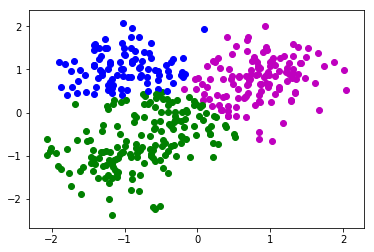

In [1390]:
s = (6 - s1)**2 - 396*one_eye
res = AffProp(1000, 0.5)
draw3(False)

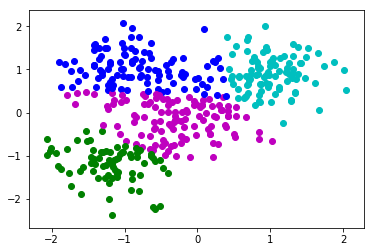

In [1391]:
s = 6 - s1 - 34*one_eye
res = AffProp(1000, 0.5)
draw3(False)

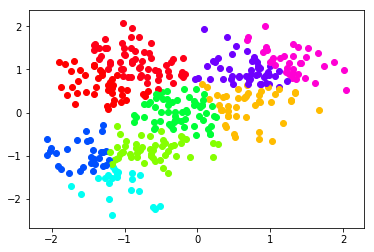

In [1392]:
s = 6 - s1 - 10*one_eye
res = AffProp(1000, 0.5)
draw3()